
Mean value differences for each hemisphere:

Left Hemisphere:
  Average Correlation (pre): 0.300341
  Average Correlation (post): 0.244660
  Difference: -0.055681

Right Hemisphere:
  Average Correlation (pre): 0.289363
  Average Correlation (post): 0.220568
  Difference: -0.068795

Both Hemispheres:
  Average Correlation (pre): 0.285729
  Average Correlation (post): 0.199253
  Difference: -0.086476

CSV files have been successfully created: 'left_hemisphere.csv', 'right_hemisphere.csv', 'both_hemisphere.csv'
Percentage Differences: left h.- -18.539314151883957, right h.--23.774496772752887, both h.--30.26491941163164


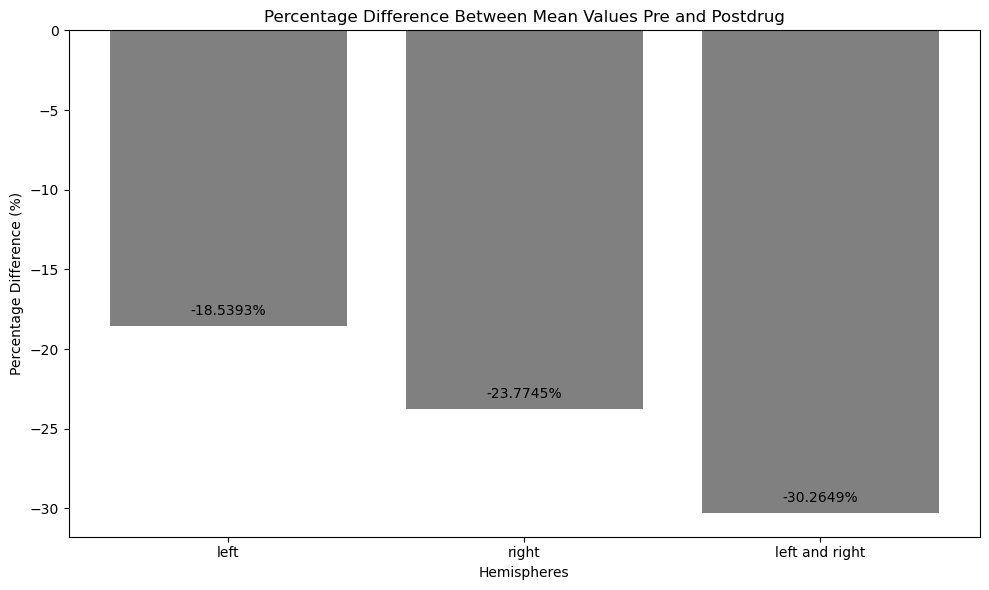

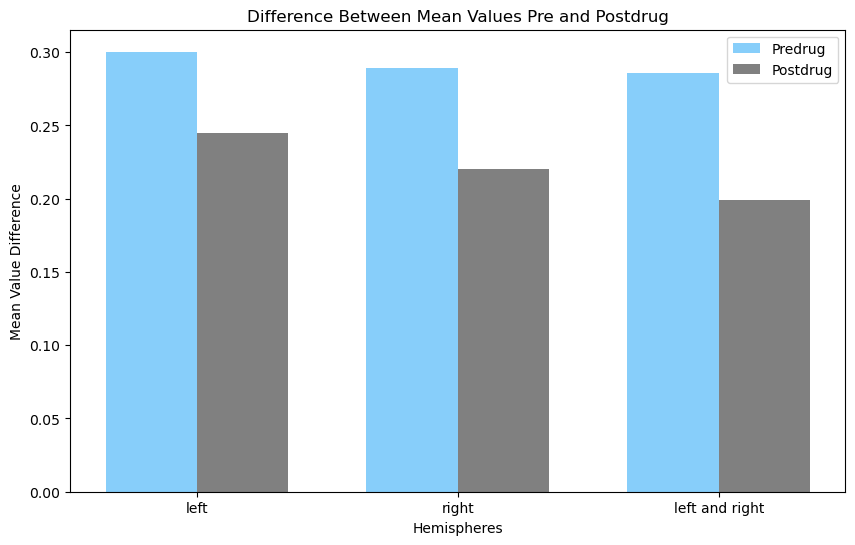

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV files
pre_df = pd.read_csv('correlation_files/csv_tables/Tabea_correlation_matrix_long_format_predrug_003.csv')
post_df = pd.read_csv('correlation_files/csv_tables/Tabea_correlation_matrix_long_format_postdrug_003.csv')

# Extract the correlations from the CSV files
pre_df = pre_df[['Variable1', 'Variable2', 'Correlation']]
post_df = post_df[['Variable1', 'Variable2', 'Correlation']]

# Merge the two DataFrames (pre and post) while preventing duplicate comparisons
merged_df = pd.merge(pre_df, post_df, on=['Variable1', 'Variable2'], suffixes=('_pre', '_post'))

# Remove duplicate comparisons by sorting based on variable pairs
merged_df['Variable_pair'] = merged_df.apply(lambda row: tuple(sorted([row['Variable1'], row['Variable2']])), axis=1)

# Remove duplicate comparisons (filter based only on 'Variable_pair')
merged_df = merged_df.drop_duplicates(subset=['Variable_pair'])

# Function to calculate the percentage difference considering correlation = 0
def calculate_percent_diff(row):
    pre_corr = row['Correlation_pre']
    post_corr = row['Correlation_post']
    
    if pre_corr == 0:
        return  0
    elif pre_corr > 0.2 and pre_corr != 1.0:
        # Standard calculation of the percentage difference while retaining the sign
        return ((post_corr - pre_corr) / pre_corr) * 100
    else:
        # For other values where no calculation is necessary
        return 0

# Calculate the absolute difference and the percentage difference of the correlations
merged_df['abs_diff'] = abs(merged_df['Correlation_post'] - merged_df['Correlation_pre'])
merged_df['percent_diff'] = merged_df.apply(calculate_percent_diff, axis=1)

# Round the values to 6 decimal places
merged_df['Correlation_pre'] = merged_df['Correlation_pre'].round(6)
merged_df['Correlation_post'] = merged_df['Correlation_post'].round(6)
merged_df['abs_diff'] = merged_df['abs_diff'].round(6)
merged_df['percent_diff'] = merged_df['percent_diff'].round(6)

# Function to assign hemisphere based on variable names
def hemisphere_assignment(row):
    var1, var2 = row['Variable1'], row['Variable2']
    
    if var1.startswith('CL') and var2.startswith('CL'):
        return 'left'
    elif var1.startswith('CR') and var2.startswith('CR'):
        return 'right'
    elif ('CL' in [var1[:2], var2[:2]]) and ('CR' in [var1[:2], var2[:2]]):
        return 'both'
    else:
        return 'unknown'

# Apply the function to assign hemisphere
merged_df['hemisphere'] = merged_df.apply(hemisphere_assignment, axis=1)

# Filter DataFrames by hemisphere
left_df = merged_df[merged_df['hemisphere'] == 'left']
right_df = merged_df[merged_df['hemisphere'] == 'right']
both_df = merged_df[merged_df['hemisphere'] == 'both']

# Sort the DataFrames by percentage difference (descending)
left_df = left_df.sort_values(by='percent_diff', ascending=False)
right_df = right_df.sort_values(by='percent_diff', ascending=False)
both_df = both_df.sort_values(by='percent_diff', ascending=False)

# Calculate the mean correlations for pre and post for each hemisphere
# Filter the DataFrames to keep only the desired values
filtered_left_df = left_df[(left_df['Correlation_pre'] > 0.2) & (left_df['Correlation_pre'] != 1.0)]
filtered_right_df = right_df[(right_df['Correlation_pre'] > 0.2) & (right_df['Correlation_pre'] != 1.0)]
filtered_both_df = both_df[(both_df['Correlation_pre'] > 0.2) & (both_df['Correlation_pre'] != 1.0)]

left_mean_pre = filtered_left_df['Correlation_pre'].mean()
left_mean_post = filtered_left_df['Correlation_post'].mean()

right_mean_pre = filtered_right_df['Correlation_pre'].mean()
right_mean_post = filtered_right_df['Correlation_post'].mean()

both_mean_pre = filtered_both_df['Correlation_pre'].mean()
both_mean_post = filtered_both_df['Correlation_post'].mean()

# Calculate the difference in mean values for each hemisphere
left_diff = left_mean_post - left_mean_pre
right_diff = right_mean_post - right_mean_pre
both_diff = both_mean_post - both_mean_pre

# Output the mean value differences
print("\nMean value differences for each hemisphere:")

print("\nLeft Hemisphere:")
print(f"  Average Correlation (pre): {left_mean_pre:.6f}")
print(f"  Average Correlation (post): {left_mean_post:.6f}")
print(f"  Difference: {left_diff:.6f}")

print("\nRight Hemisphere:")
print(f"  Average Correlation (pre): {right_mean_pre:.6f}")
print(f"  Average Correlation (post): {right_mean_post:.6f}")
print(f"  Difference: {right_diff:.6f}")

print("\nBoth Hemispheres:")
print(f"  Average Correlation (pre): {both_mean_pre:.6f}")
print(f"  Average Correlation (post): {both_mean_post:.6f}")
print(f"  Difference: {both_diff:.6f}")

# Save the DataFrames to CSV files
left_df.to_csv('Verification_csv/Tabea_test/left_hemisphere_w_smooth.csv', index=False)
right_df.to_csv('Verification_csv/Tabea_test/right_hemisphere_w_smooth.csv', index=False)
both_df.to_csv('Verification_csv/Tabea_test/both_hemisphere_w_smooth.csv', index=False)

# Output the file paths
print("\nCSV files have been successfully created: 'left_hemisphere.csv', 'right_hemisphere.csv', 'both_hemisphere.csv'")

# Calculate percentage differences
percentage_diff_left = (left_diff / left_mean_pre) * 100
percentage_diff_right = (right_diff / right_mean_pre) * 100
percentage_diff_both = (both_diff / both_mean_pre) * 100
print(f"Percentage Differences: left h.- {percentage_diff_left}, right h.-{percentage_diff_right}, both h.-{percentage_diff_both}")

# Plot the percentage differences
labels = ['left', 'right', 'left and right']
percentage_differences = [percentage_diff_left, percentage_diff_right, percentage_diff_both]
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, percentage_differences, color='grey')
ax.set_xlabel('Hemispheres')
ax.set_ylabel('Percentage Difference (%)')
ax.set_title('Percentage Difference Between Mean Values Pre and Postdrug')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.4f}%', ha='center', va='bottom')
plt.tight_layout()
#plt.savefig("Percentage Difference.png")
plt.show()

# Plot bar chart for pre- and post-drug mean differences
predrug_means = [left_mean_pre, right_mean_pre, both_mean_pre]
postdrug_means = [left_mean_post, right_mean_post, both_mean_post]
labels = ['left', 'right', 'left and right']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars_predrug = ax.bar(x - width / 2, predrug_means, width, label='Predrug', color='lightskyblue')
bars_postdrug = ax.bar(x + width / 2, postdrug_means, width, label='Postdrug', color='grey')
ax.set_xlabel('Hemispheres')
ax.set_ylabel('Mean Value Difference')
ax.set_title('Difference Between Mean Values Pre and Postdrug')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("Bar_chart.png")
plt.show()
